In [78]:
import pandas as pd

Your task is to define and train a machine learning model for predicting the price of a laptop (buynow_price column in the dataset) based on its attributes. When testing and comparing your models, aim to minimize the RMSE measure.
ndex(['buynow_price', 'graphic card type', 'communications', 'resolution (px)', 'CPU cores', 'RAM size', 'operating system', 'drive type', 'input devices', 'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model', 'state', 'drive memory size (GB)', 'warranty', 'screen size'], dtype='object') generate the data on thos feastures python

In [80]:
df = pd.read_csv('Laptop_price.csv')

In [81]:
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459


In [84]:
df['Brand'].unique()

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [86]:
lr = LabelEncoder()
df['Brand'] = lr.fit_transform(df['Brand'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   int32  
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 50.9 KB


In [88]:
X = df.drop(['Price'], axis=1)
y = df['Price']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [91]:
sc = StandardScaler()

In [92]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
from sklearn.linear_model import LinearRegression as LR

In [94]:
Lr = LR()

In [95]:
model = Lr.fit(X_train, y_train)

In [96]:
y_pred = model.predict(X_test)

In [97]:
from sklearn.metrics import r2_score

In [98]:
r2 = r2_score(y_test, y_pred)

An R² score of 0.9996 suggests that 99.96% of the variability in the target variable (e.g., laptop prices) can be explained by the model using the provided features. This implies that the model fits the data extremely well.


In [100]:
import matplotlib.pyplot as plt

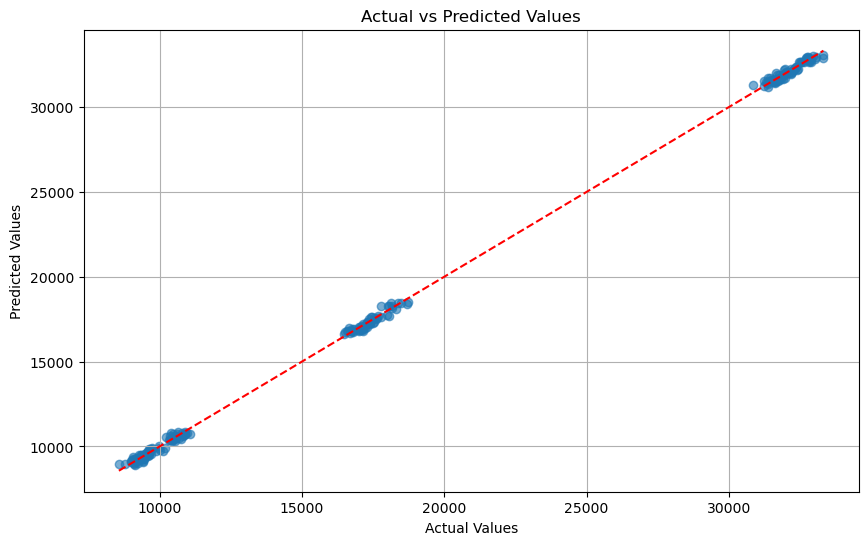

In [103]:
import matplotlib.pyplot as plt

# Plotting the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


In [104]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
rfc = RandomForestRegressor(n_estimators=10, random_state=42)

In [108]:
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [109]:
y = rfc.predict(X_test)

In [111]:
r = r2_score(y_test, y)

In [112]:
r

0.9994560514240374

In [113]:
from sklearn.metrics import mean_squared_error

In [114]:
mse = mean_squared_error(y_test, y_pred)

In [116]:
import numpy as np

In [117]:
rmse = np.sqrt(mse)

In [118]:
rmse

178.8003984052306